In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram
from IPython.display import display
%matplotlib inline

# Shor's code algorithm

The Shor's code algorithm encodes a single qubit into a 9-qubit entangled state.

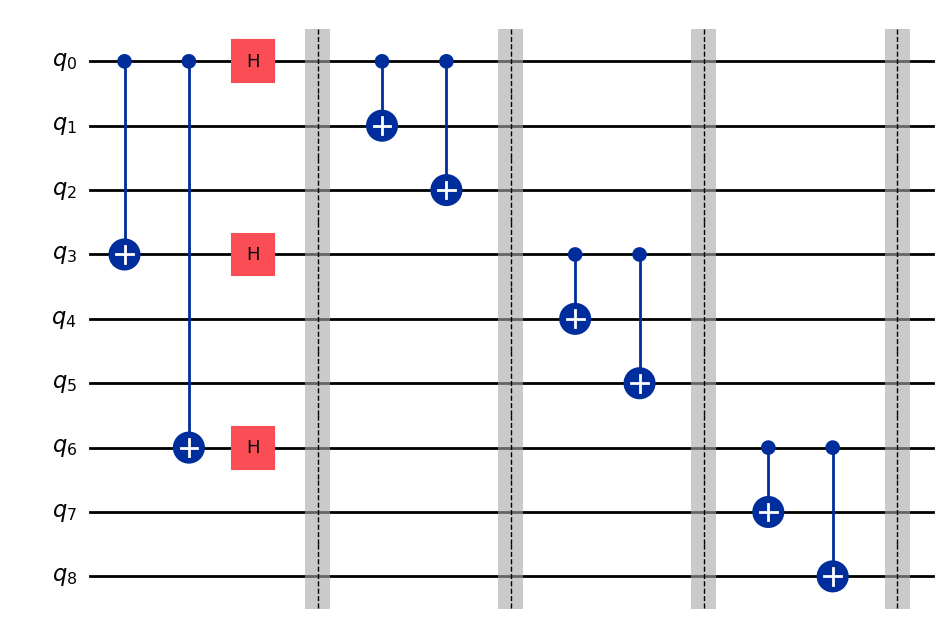

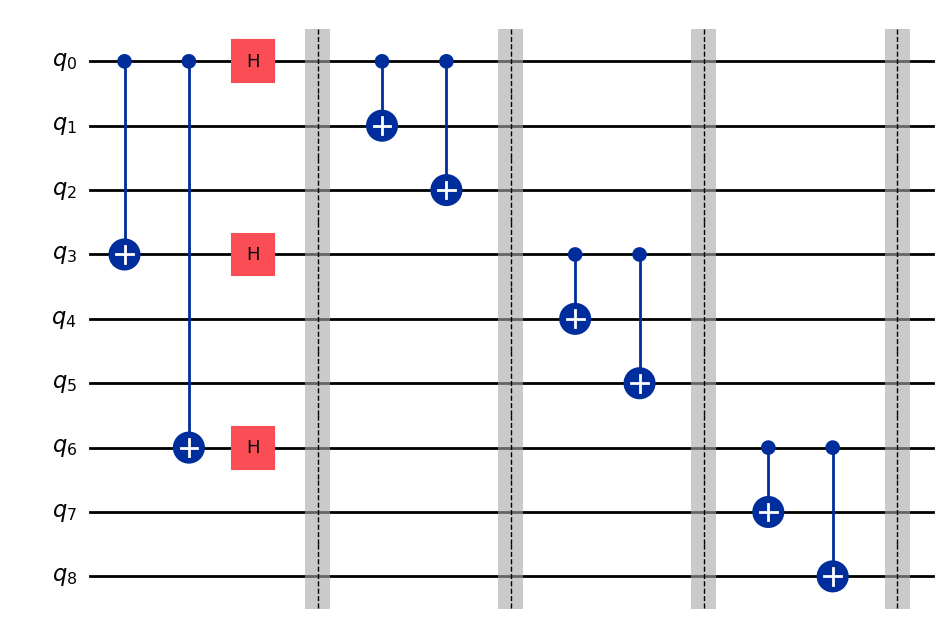

In [18]:
circuit = QuantumCircuit(9)
circuit.cx(0, 3)
circuit.cx(0, 6)
circuit.h([0, 3, 6])
circuit.barrier()
for i in [0, 3, 6]:
    circuit.cx(i, i+1)
    circuit.cx(i, i+2)
    circuit.barrier()
circuit.draw('mpl')

In [19]:
state = Statevector.from_instruction(circuit)
state.draw("latex")

<IPython.core.display.Latex object>

Define the error model for the noise simulation.

In [ ]:
prob_error = 0.05
noise_model = NoiseModel()
error_x = pauli_error([('X', prob_error), ('I', 1 - prob_error)])
error_z = pauli_error([('Z', prob_error), ('I', 1 - prob_error)])
noise_model.add_all_qubit_quantum_error(error_x.compose(error_z), ['id', 'u1', 'u2', 'u3', 'cx'])

Simulate the channel.

In [ ]:
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(circuit, backend)
results = backend.run(circuit, shots=1024, noise_model=noise_model).result().get_counts()
# TODO: finish simlulation code
# TODO: check all the code